# Project on Image dataset

#import Libraray

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#import dataset

In [3]:

filename = 'facial_keypoints.csv'
#names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data =pd.read_csv(filename)
#data.set_index('day',inplace=True)
new=data.interpolate()


In [ ]:
#sumraize dataset

In [4]:
print(new.shape)
print(new.dtypes)
peek=(new.head(20))
print(new)

(7049, 30)
left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x     

In [5]:
# descriptions
print(new.describe())

       left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        7049.000000        7049.000000         7049.000000   
mean           66.358689          37.649634           30.307762   
std             3.446929           3.151793            3.083862   
min            22.763345           1.616512            0.686592   
25%            65.081720          35.900235           28.784052   
50%            66.497566          37.526919           30.253135   
75%            68.024628          39.254735           31.769832   
max            94.689280          80.502649           85.039381   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         7049.000000              7049.000000              7049.000000   
mean            37.976079                59.224000                36.674178   
std              3.031842                 1.530380                 1.578407   
min              4.091264                19.064954                27.190098   
2

In [6]:
# class distribution
print(new.groupby('left_eye_center_x').size())

left_eye_center_x
22.763345    1
35.348452    1
36.165660    1
36.949354    1
37.952179    1
38.334186    1
38.853525    1
39.455086    1
40.458999    1
40.658697    1
41.035462    1
41.233512    1
41.242587    1
41.538182    1
41.592528    1
42.412560    1
42.479959    1
42.516900    1
42.926796    1
43.312994    1
43.561870    1
43.757947    1
43.831496    1
43.957232    1
43.973194    1
44.136777    1
44.148884    1
44.247771    1
44.380215    1
44.448507    1
            ..
75.007892    1
75.036717    1
75.045257    1
75.154598    1
75.351800    1
75.447771    1
75.504148    1
75.772042    1
75.861128    1
75.943959    1
76.000050    1
76.027488    1
76.115978    1
76.389818    1
76.621617    1
77.076045    1
77.445208    1
77.451863    1
77.773794    1
78.013082    1
78.317029    1
78.393899    1
78.516103    1
78.550652    1
78.577804    1
81.442830    1
84.829417    1
87.632610    1
92.622962    1
94.689280    1
Length: 7031, dtype: int64


# data Visiulization

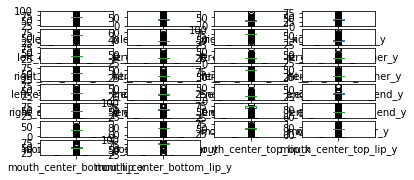

In [7]:
# box and whisker plots
new.plot(kind='box', subplots=True, layout=(12,4), sharex=False, sharey=False )
pyplot.show()

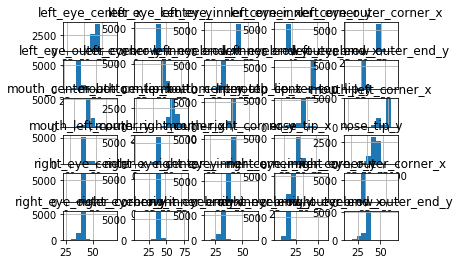

In [8]:
# histograms
new.hist()
pyplot.show()

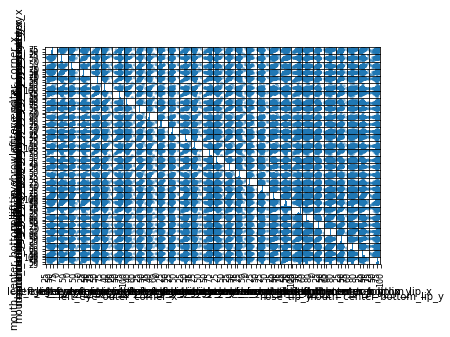

In [9]:
# scatter plot matrix
scatter_matrix(new)
pyplot.show()

In [1]:
## Evaluate Some Algorithms

In [10]:
# Split-out validation dataset
array = new.values
X = array[:,0:4]
Y = array[:,4].astype(int)
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [11]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.748891 (0.009510)
LDA: 0.737187 (0.010852)
KNN: 0.712893 (0.011387)
CART: 0.608267 (0.013775)
NB: 0.740025 (0.010911)
SVM: 0.749777 (0.009255)


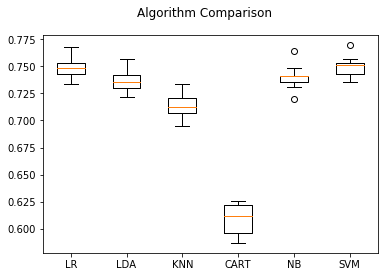

In [12]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [2]:
## Make Predictions

In [13]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.701418439716312
[[  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0   0   1   0   1   2   9   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   5   5  15   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3   6   5  38   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   4   7   8  71   2   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   1   1   7  22  32 968  13   8   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   3  75  

C:\Users\shahzaib\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shahzaib\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
